In [35]:
import sys
import stlearn as st
st.settings.set_figure_params(dpi=300)
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))
from PIL import Image
from stimage._utils import gene_plot, Read10X, ReadOldST, tiling
# from stimage._model import CNN_NB_trainable
from stimage._data_generator import DataGenerator
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [36]:
BASE_PATH = Path("/scratch/imb/Xiao/STimage/dataset/breast_cancer_10x_visium")
TILE_PATH = Path("/tmp") / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)

SAMPLE = "block1"
Sample1 = st.Read10X(BASE_PATH / SAMPLE, 
                  library_id=SAMPLE, 
                  count_file="V1_Breast_Cancer_Block_A_Section_1_filtered_feature_bc_matrix.h5",
                  quality="fulres",)
                  #source_image_path=BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_1_image.tif")
img = plt.imread(BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_1_image.tif", 0)
Sample1.uns["spatial"][SAMPLE]['images']["fulres"] = img

SAMPLE = "block2"
Sample2 = st.Read10X(BASE_PATH / SAMPLE, 
                  library_id=SAMPLE, 
                  count_file="V1_Breast_Cancer_Block_A_Section_2_filtered_feature_bc_matrix.h5",
                  quality="fulres",)
                  #source_image_path=BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_1_image.tif")
img = plt.imread(BASE_PATH / SAMPLE /"V1_Breast_Cancer_Block_A_Section_2_image.tif", 0)
Sample2.uns["spatial"][SAMPLE]['images']["fulres"] = img

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [37]:
Sample1.obsm['cm'] = Sample1.to_df()

In [38]:
Sample1.obsm['cm']

MIR1302-2HG  FAM138A  OR4F5  AL627309.1  AL627309.3  \
AAACAAGTATCTCCCA-1          0.0      0.0    0.0         0.0         0.0   
AAACACCAATAACTGC-1          0.0      0.0    0.0         0.0         0.0   
AAACAGAGCGACTCCT-1          0.0      0.0    0.0         0.0         0.0   
AAACAGGGTCTATATT-1          0.0      0.0    0.0         0.0         0.0   
AAACAGTGTTCCTGGG-1          0.0      0.0    0.0         0.0         0.0   
...                         ...      ...    ...         ...         ...   
TTGTTGTGTGTCAAGA-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTCACATCCAGG-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTCCATACAACT-1          0.0      0.0    0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1          0.0      0.0    0.0         0.0         0.0   

                    AL627309.2  AL627309.5  AL627309.4  AP006222.2  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0         0.0   
AAACAGGGTCTATATT-1         0.0         0.0         0.0         0.0   
AAACAGTGTTCCTGGG-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0   
TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0   
TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         0.0   

                    AL732372.1  ...  AC133551.1  AC136612.1  AC136616.1  \
AAACAAGTATCTCCCA-1         0.0  ...         0.0         0.0         0.0   
AAACACCAATAACTGC-1         0.0  ...         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1         0.0  ...         0.0         0.0         0.0   
AAACAGGGTCTATATT-1         0.0  ...         0.0         0.0         0.0   
AAACAGTGTTCCTGGG-1         0.0  ...         0.0         0.0         0.0   
...                        ...  ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1         0.0  ...         0.0         0.0         0.0   
TTGTTTCACATCCAGG-1         0.0  ...         0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1         0.0  ...         0.0         0.0         0.0   
TTGTTTCCATACAACT-1         0.0  ...         0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1         0.0  ...         0.0         0.0         0.0   

                    AC136616.3  AC136616.2  AC141272.1  AC023491.2  \
AAACAAGTATCTCCCA-1         0.0         0.0         0.0         0.0   
AAACACCAATAACTGC-1         0.0         0.0         0.0         0.0   
AAACAGAGCGACTCCT-1         0.0         0.0         0.0         0.0   
AAACAGGGTCTATATT-1         0.0         0.0         0.0         0.0   
AAACAGTGTTCCTGGG-1         0.0         0.0         0.0         0.0   
...                        ...         ...         ...         ...   
TTGTTGTGTGTCAAGA-1         0.0         0.0         0.0         0.0   
TTGTTTCACATCCAGG-1         0.0         0.0         0.0         0.0   
TTGTTTCATTAGTCTA-1         0.0         0.0         0.0         0.0   
TTGTTTCCATACAACT-1         0.0         0.0         0.0         0.0   
TTGTTTGTGTAAATTC-1         0.0         0.0         0.0         0.0   

                    AC007325.1  AC007325.4  AC007325.2  
AAACAAGTATCTCCCA-1         0.0         0.0         0.0  
AAACACCAATAACTGC-1         0.0         0.0         0.0  
AAACAGAGCGACTCCT-1         0.0         0.0         0.0  
AAACAGGGTCTATATT-1         0.0         0.0         0.0  
AAACAGTGTTCCTGGG-1         0.0         0.0         0.0  
...                        ...         ...         ...  
TTGTTGTGTGTCAAGA-1         0.0         1.0         0.0  
TTGTTTCACATCCAGG-1         0.0         0.0         0.0  
TTGTTTCATTAGTCTA-1     

In [39]:
gene_list=["COX6C","TTLL12", "PABPC1", "GNAS", "HSP90AB1", 
           "TFF3", "ATP1A1", "B2M", "FASN", "SPARC", "CD74", "CD63", "CD24", "CD81"]

In [40]:
for adata in [
    Sample1,
    Sample2,
]:
#     count_df = adata.to_df()
#     count_df[count_df <=1] = 0
#     count_df[count_df >1] = 1
#     adata.X = count_df
#     adata[:,gene_list]
    st.pp.filter_genes(adata,min_cells=3)
#     st.pp.normalize_total(adata)
    st.pp.log1p(adata)
#     st.pp.scale(adata)

    # pre-processing for spot image
    TILE_PATH_ = TILE_PATH / list(adata.uns["spatial"].keys())[0]
    TILE_PATH_.mkdir(parents=True, exist_ok=True)
    tiling(adata, TILE_PATH_, crop_size=299)

Log transformation step is finished in adata.X


Tiling image: 100%|██████████ [ time left: 00:00 ]


Log transformation step is finished in adata.X


Tiling image: 100%|██████████ [ time left: 00:00 ]


In [109]:
# n_genes = len(gene_list)
n_genes = 1

In [113]:
gene= ["COX6C"]

In [114]:
training_index = Sample1.obs.sample(frac=0.7, random_state=1).index
training_dataset = Sample1[training_index,].copy()

valid_index = Sample1.obs.index.isin(training_index)
valid_dataset = Sample1[~valid_index,].copy()

test_dataset = Sample2.copy()

train_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=training_dataset, 
                          genes=gene, aug=False),
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
train_gen_ = train_gen.shuffle(buffer_size=500).batch(128).repeat(3).cache().prefetch(tf.data.experimental.AUTOTUNE)
valid_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=valid_dataset, 
                          genes=gene), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
valid_gen_ = valid_gen.shuffle(buffer_size=500).batch(128).repeat(3).cache().prefetch(tf.data.experimental.AUTOTUNE)
test_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=test_dataset, 
                          genes=gene), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
test_gen_ = test_gen.batch(1)

In [103]:
test_dataset

AnnData object with n_obs × n_vars = 3987 × 22345
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

In [104]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as preprocess_resnet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow_probability as tfp
tf.compat.v1.enable_eager_execution()
tfd = tfp.distributions
tfb = tfp.bijectors
import six
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.utils.tf_utils import is_tensor_or_variable

def ZINB_layer(out): 
    n = tf.squeeze(tf.math.softplus(out[:,0:1]))

    p = tf.squeeze(tf.math.sigmoid(out[:,1:2]))

    s = tf.math.sigmoid(out[:,2:3])

    probs = tf.concat([1-s, s], axis=1)
    
    mix = tfd.Mixture(
          cat=tfd.Categorical(probs=probs),
          components=[
          tfd.Deterministic(loc=tf.zeros_like(n)),
          tfd.NegativeBinomial(total_count=n, probs=p),
        ])
    return mix


def NB_layer(out): 
    n = tf.squeeze(tf.math.softplus(out[:,0:1]))

    p = tf.squeeze(tf.math.sigmoid(out[:,1:2]))

#     s = tf.math.sigmoid(out[:,2:3])

#     probs = tf.concat([1-s, s], axis=1)
    
    NB = tfd.NegativeBinomial(total_count=n, probs=p)
    
    return NB


def NLL(y_true, y_hat):
    return -y_hat.log_prob(tf.reshape(y_true,(-1,)))


class MeanMetricWrapper(tf.keras.metrics.Mean):
    def __init__(self, fn, name=None, dtype=None, **kwargs):
        super(MeanMetricWrapper, self).__init__(name=name, dtype=dtype)
        self._fn = fn
        self._fn_kwargs = kwargs
    def update_state(self, y_true, y_pred, sample_weight=None):
        matches = self._fn(y_true, y_pred, **self._fn_kwargs)
        return super(MeanMetricWrapper, self).update_state(
                     matches, sample_weight=sample_weight)
    def get_config(self):
        config = {}
        for k, v in six.iteritems(self._fn_kwargs):
            config[k] = K.eval(v) if is_tensor_or_variable(v) else v
        base_config = super(MeanMetricWrapper, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


def vgg16_ZINB(tile_shape):
    tile_input = Input(shape=tile_shape, name = "tile_input")
    VGG16_base = VGG16(input_tensor=tile_input, weights='imagenet', include_top=False)
    for layer in VGG16_base.layers:
        layer.trainable = False
    
    cnn = VGG16_base.output
    cnn = GlobalAveragePooling2D()(cnn)
    cnn = Dropout(0.5)(cnn)
    cnn = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.01))(cnn)
    # cnn = Dense(256, activation='relu')(cnn)
    
    outputs = Dense(3)(cnn)

#     p_y_zinb = tfp.layers.DistributionLambda(zero_inf)(outputs)
    p_y_zinb = tfp.layers.DistributionLambda(ZINB_layer)(outputs)

    model = Model(inputs=tile_input, outputs=[p_y_zinb])

#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=NLL,
                  optimizer=optimizer,
                  metrics=[MeanMetricWrapper(NLL, name="nll")])    
    return model


def vgg16_NB(tile_shape):
    tile_input = Input(shape=tile_shape, name = "tile_input")
    VGG16_base = VGG16(input_tensor=tile_input, weights='imagenet', include_top=False)
    for layer in VGG16_base.layers:
        layer.trainable = False
    
    cnn = VGG16_base.output
    cnn = GlobalAveragePooling2D()(cnn)
    cnn = Dropout(0.5)(cnn)
    cnn = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.1))(cnn)
    # cnn = Dense(256, activation='relu')(cnn)
    
    outputs = Dense(2)(cnn)

#     p_y_zinb = tfp.layers.DistributionLambda(zero_inf)(outputs)
    p_y_nb = tfp.layers.DistributionLambda(NB_layer)(outputs)

    model = Model(inputs=tile_input, outputs=[p_y_nb])

#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(0.0001)

    model.compile(loss=NLL,
                  optimizer=optimizer,
                  metrics=[MeanMetricWrapper(NLL, name="nll")])    
    return model

In [105]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [106]:
def resnet_ZINB(tile_shape, n_genes):
    tile_input = Input(shape=tile_shape, name = "tile_input")
    resnet_base = ResNet50(input_tensor=tile_input, weights='imagenet', include_top=False)
    stage_5_start = resnet_base.get_layer("conv5_block1_1_conv")
    for i in range(resnet_base.layers.index(stage_5_start)):
        resnet_base.layers[i].trainable = False
    
    cnn = resnet_base.output
    cnn = GlobalAveragePooling2D()(cnn)
    cnn = Dropout(0.5)(cnn)
    cnn = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01),
                activity_regularizer=tf.keras.regularizers.l2(0.01))(cnn)
    # cnn = Dense(256, activation='relu')(cnn)
    
    outputs = Dense(3)(cnn)
#     output_layers = []
#     for i in range(n_genes):
#         output = Dense(3)(cnn)
#         output_layers.append(
#             tfp.layers.DistributionLambda(ZINB_layer, name="gene_{}".format(i))(output))

#     model = Model(inputs=tile_input, outputs=output_layers)

#     p_y_zinb = tfp.layers.DistributionLambda(zero_inf)(outputs)
    p_y_zinb = tfp.layers.DistributionLambda(ZINB_layer)(outputs)

    model = Model(inputs=tile_input, outputs=p_y_zinb)

#     optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss=NLL,
                  optimizer=optimizer)    
    return model

In [111]:
# model = vgg16_ZINB((299, 299, 3))
model = resnet_ZINB((299, 299, 3), n_genes=n_genes)
# model = vgg16_NB((299, 299, 3))
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_nll', patience=20,
#                                             restore_best_weights=False)

In [80]:
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
tile_input (InputLayer)         [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 305, 305, 3)  0           tile_input[0][0]                 
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 150, 150, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [115]:
train_history = model.fit(train_gen_,
                          epochs=10,
                          validation_data=valid_gen_,
                          callbacks=[callback]
                          )

Epoch 1/10
     63/Unknown - 44s 648ms/step - loss: 124.9261WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe3f5825af0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 63s 957ms/step - loss: 124.9261 - val_loss: 40.8325
Epoch 2/10
63/63 [==============================] - 25s 393ms/st

In [52]:
model.save("./cnn_zinb_50epoch_29072024.h5")

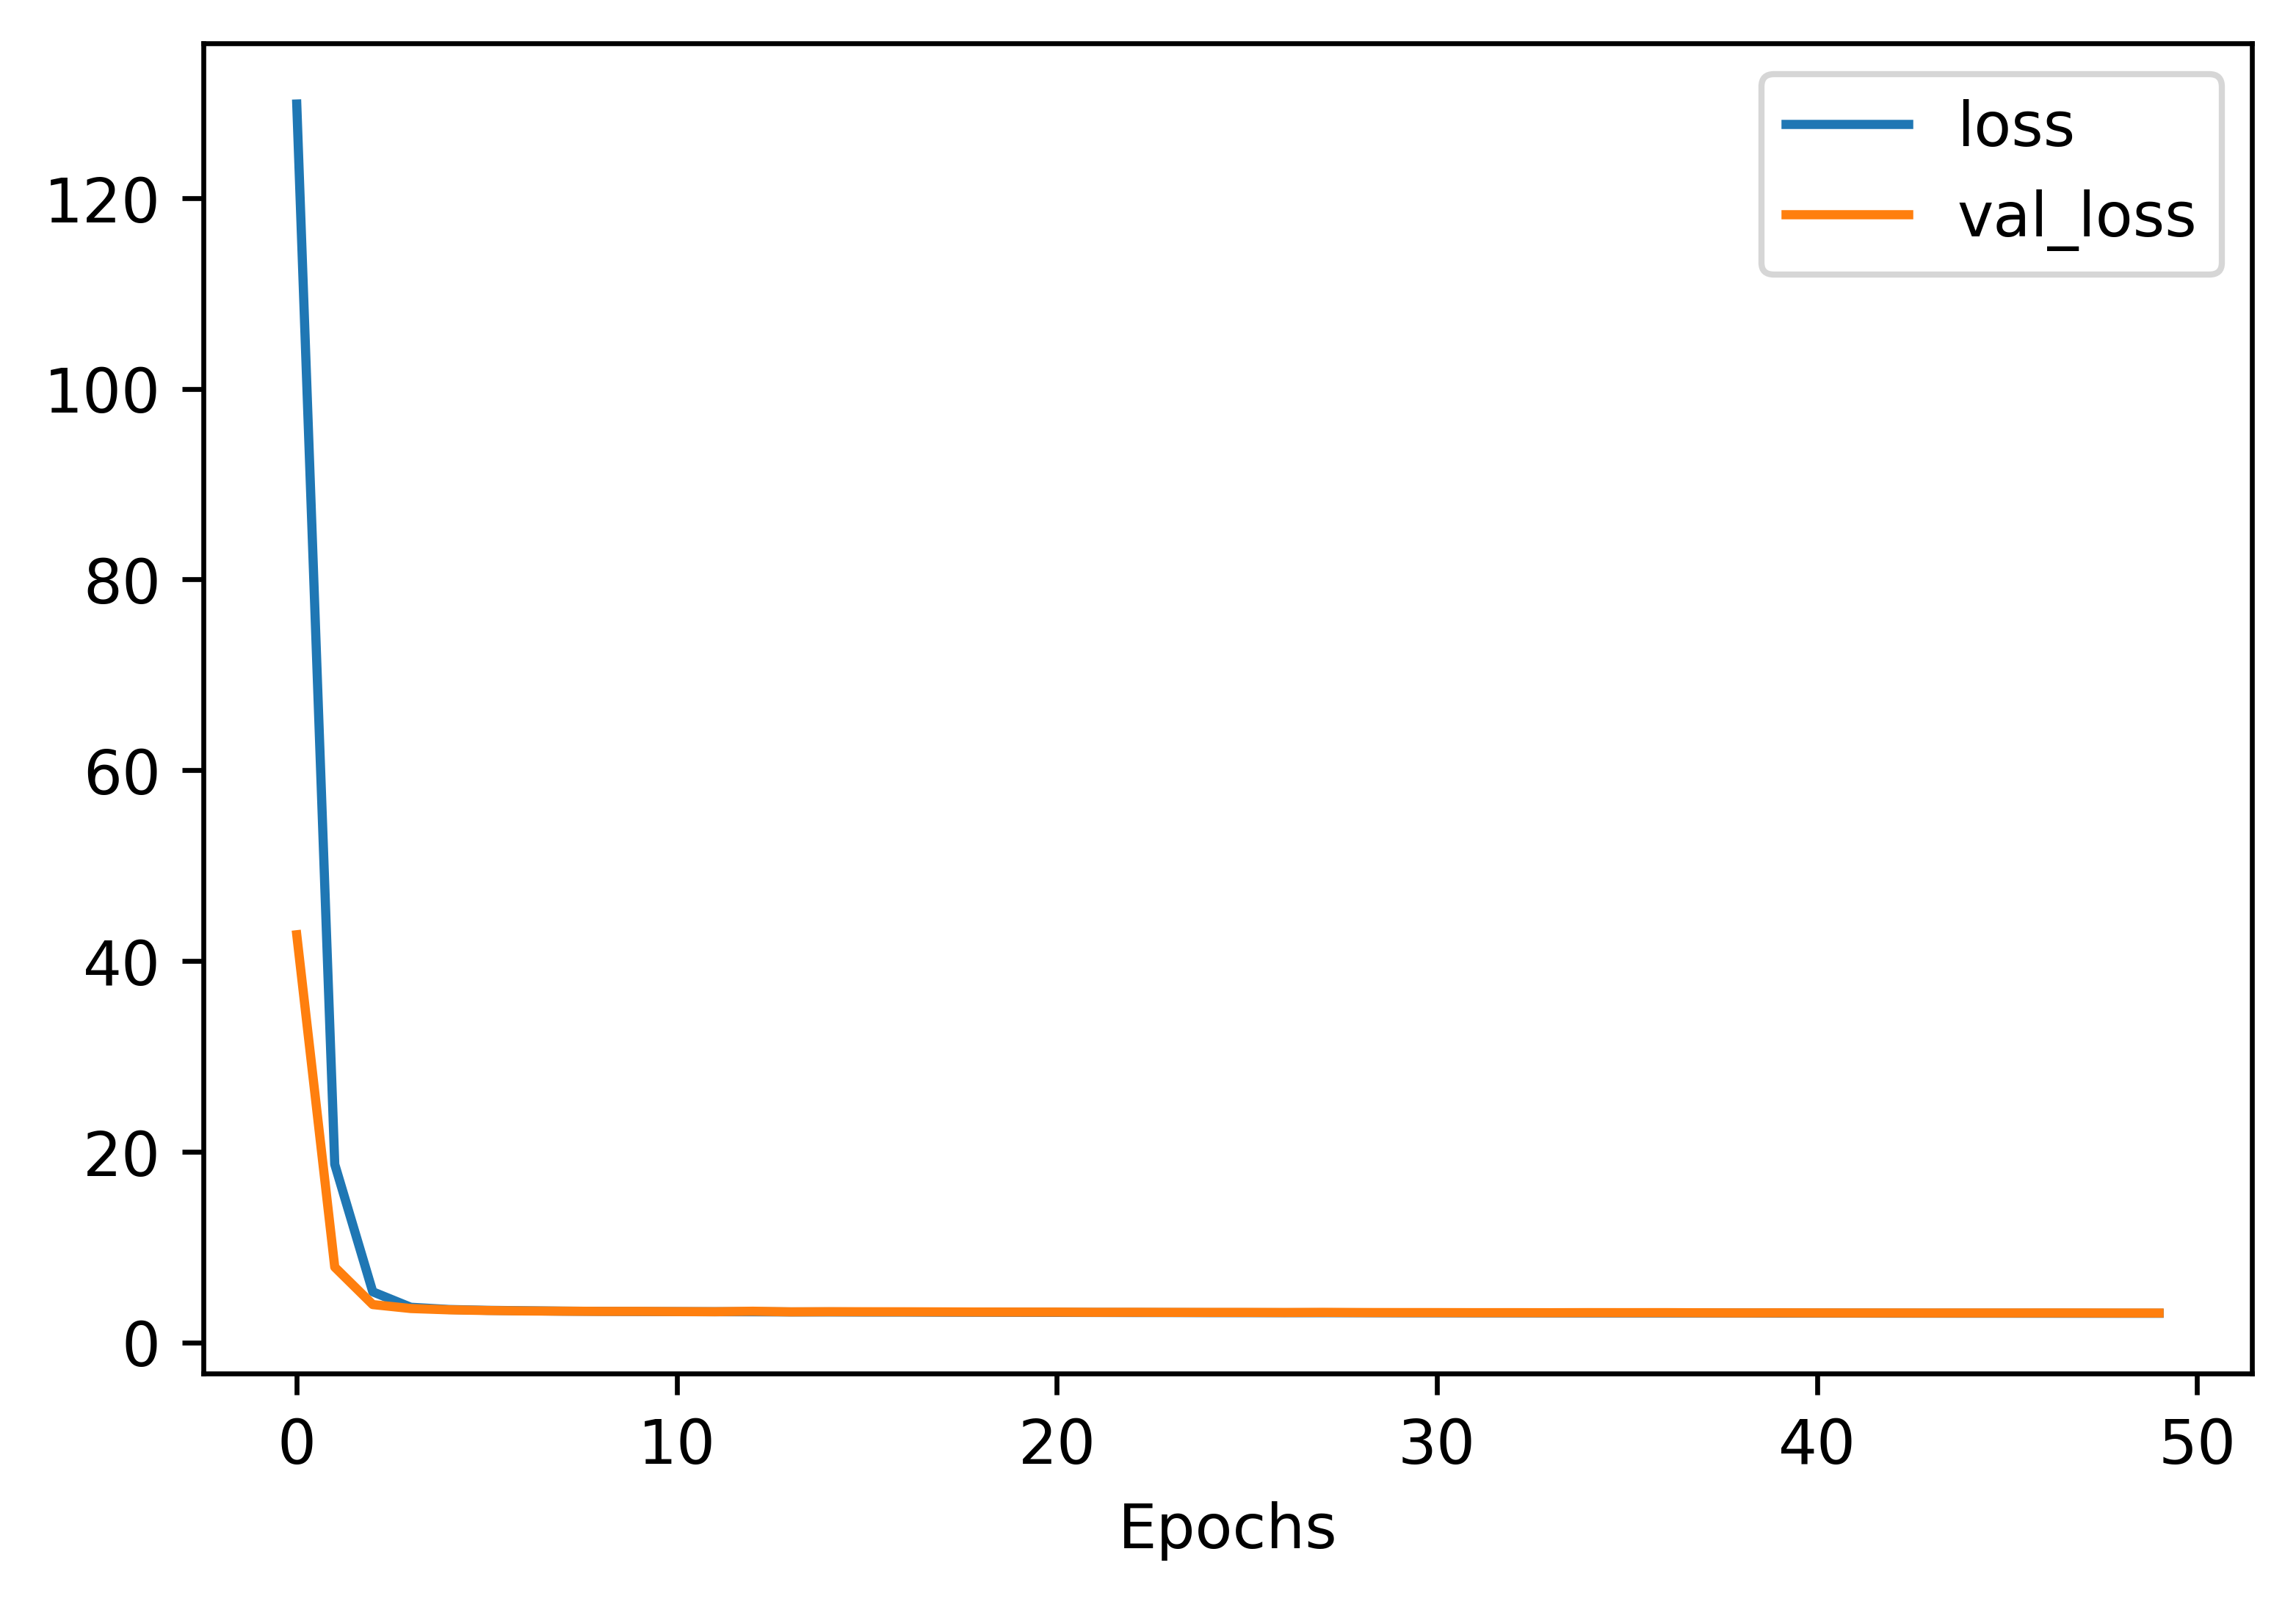

In [53]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.show()

In [116]:
test_predictions = model.predict(test_gen_)

test_dataset.obsm["predicted_gene"] = test_predictions

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [57]:
print(Path().resolve())

/scratch/imb/Xiao/STimage/development


In [58]:
OUT_PATH=Path().resolve() / "ZINB"
OUT_PATH.mkdir(exist_ok=True, parents=True)

In [72]:
for gene in gene_list:
    gene_plot(test_dataset, genes=gene, spot_size=25, library_id="block2", output= str(OUT_PATH),
             name=f"gt_{gene}.pdf")
    plt.close()

/scratch/imb/Xiao/STimage/stimage/_utils.py:314: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(
/scratch/imb/Xiao/STimage/stimage/_utils.py:314: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(
/scratch/imb/Xiao/STimage/stimage/_utils.py:314: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(
/scratch/imb/Xiao/STimage/stimage/_utils.py:314: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overr

In [74]:
test_dataset

AnnData object with n_obs × n_vars = 3987 × 22345
    obs: 'in_tissue', 'array_row', 'array_col', 'imagecol', 'imagerow', 'tile_path'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial', 'log1p'
    obsm: 'spatial', 'predicted_gene'

In [117]:
test_dataset_ = test_dataset[:,gene].copy()
test_dataset_.X = test_dataset_.obsm["predicted_gene"]

In [121]:

gene_plot(test_dataset_, genes=gene, spot_size=25, library_id="block2", output= str(OUT_PATH),margin=10,
             name=f"pred_{gene}.pdf")
plt.close()

/scratch/imb/Xiao/STimage/stimage/_utils.py:314: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(plot, cax=fig.add_axes(


In [145]:
import numpy as np
from scipy.stats import pearsonr

# Sample data
data1 = test_dataset_.to_df()["COX6C"].values
data2 = test_dataset.to_df()["COX6C"].values

# Calculate Pearson correlation coefficient
pcc, _ = pearsonr(data1, data2)

print(f"Pearson correlation coefficient: {pcc}")


Pearson correlation coefficient: 0.254170941187659


In [144]:
test_dataset_.to_df()["COX6C"].values

array([ 9.,  4., 17., ...,  7.,  4.,  8.], dtype=float32)

In [18]:
from lime import lime_image

In [44]:
explainer = lime_image.LimeImageExplainer()

In [60]:
def predict_reshape(x):
    a = model.predict(x)
    return a.reshape(-1,1)

  0%|          | 0/1000 [00:00<?, ?it/s]

prediction: 0
ground truth: [5.4764633]


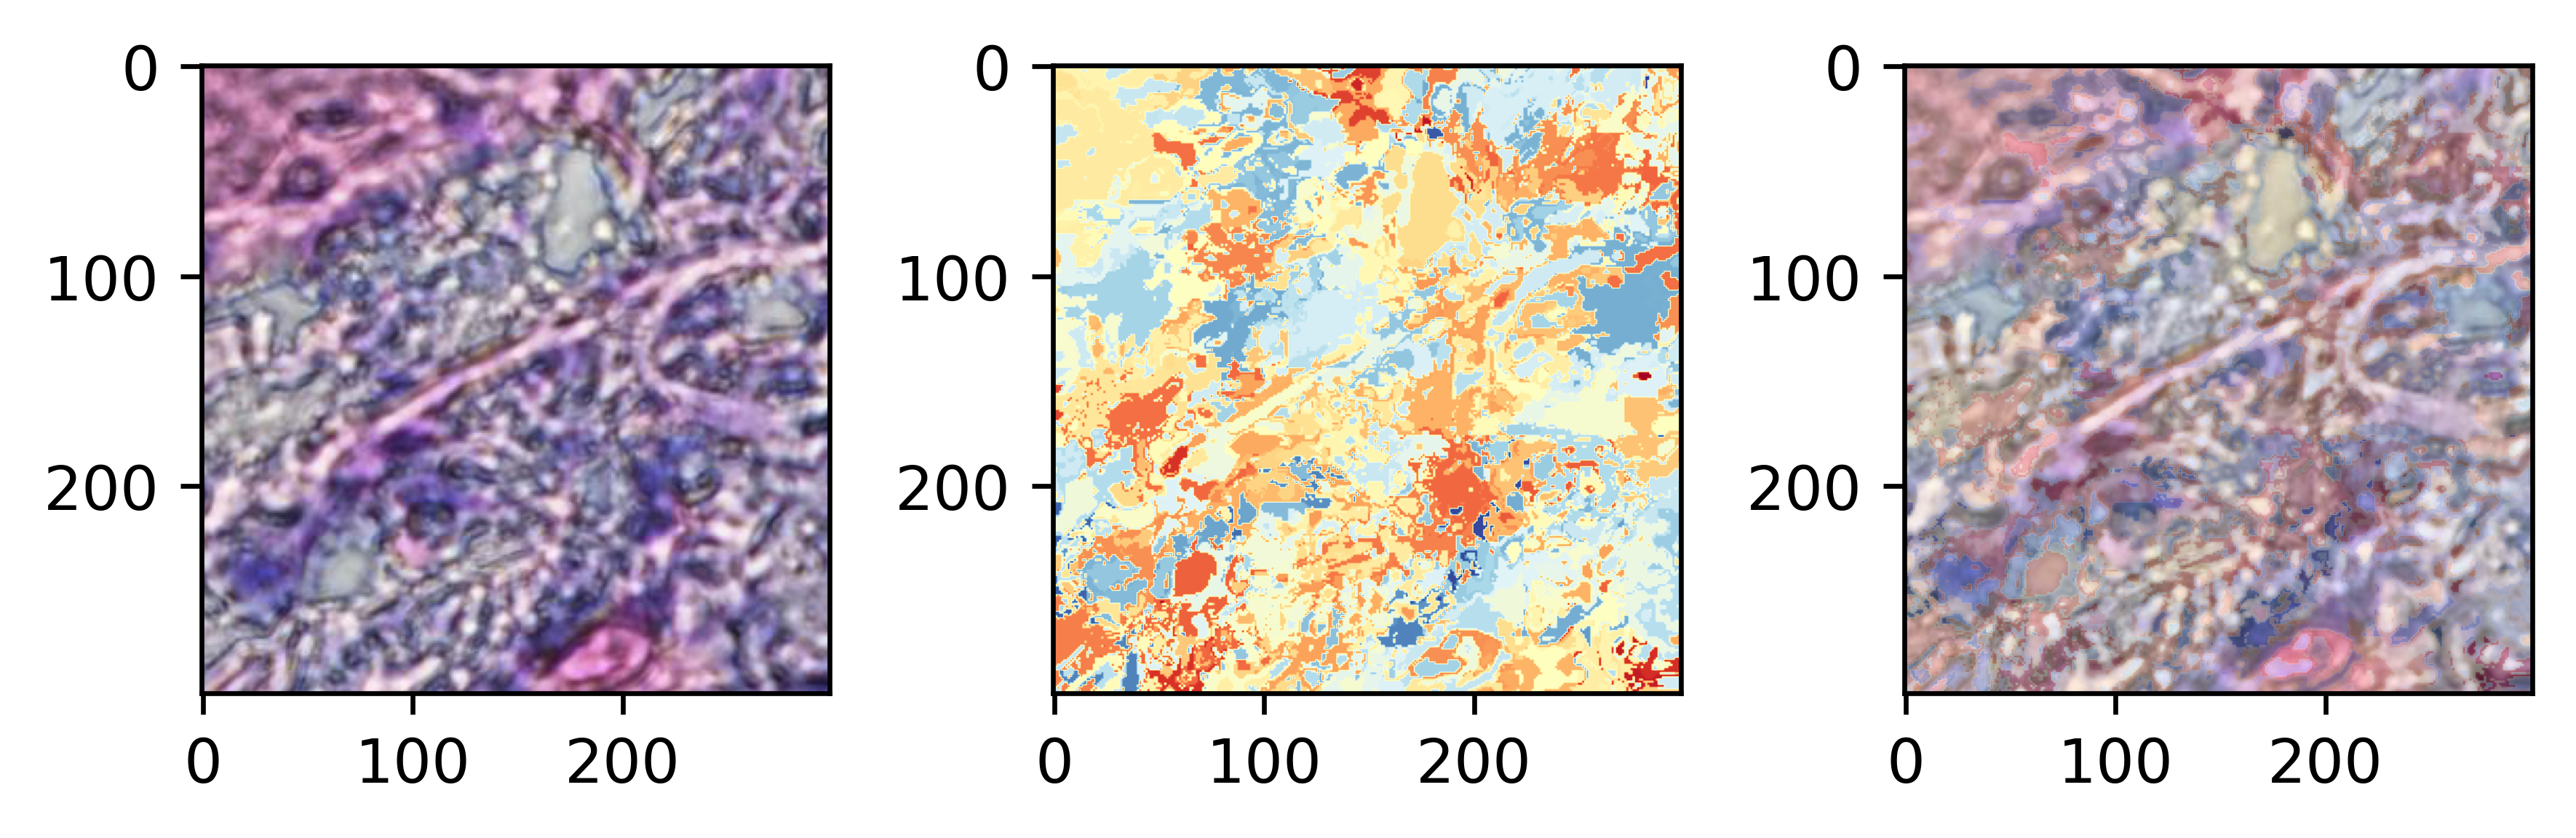

In [136]:
for image, label in test_gen.shuffle(100).take(1):
    explanation = explainer.explain_instance(image.numpy().astype("double"), 
                                             predict_reshape, top_labels=1, hide_color=0, num_samples=1000)
    dict_heatmap1 = dict(explanation.local_exp[explanation.top_labels[0]])
    heatmap1 = np.vectorize(dict_heatmap1.get)(explanation.segments)
#     heatmap1 = np.maximum(heatmap1, 0)
#     heatmap1 /= np.max(heatmap1)
    print("prediction: " + str(explanation.top_labels[0]))
    print("ground truth: " + str(label[0].numpy()))
    fig = plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(image.numpy().astype(int))
    plt.subplot(1, 3, 2)
    plt.imshow(heatmap1, alpha=1, cmap = 'RdYlBu_r')
    plt.subplot(1, 3, 3)
    plt.imshow(image.numpy().astype(int))
    plt.imshow(heatmap1, alpha=0.3, cmap = 'RdYlBu_r')
    plt.tight_layout()
    plt.show()
#     plt.colorbar()

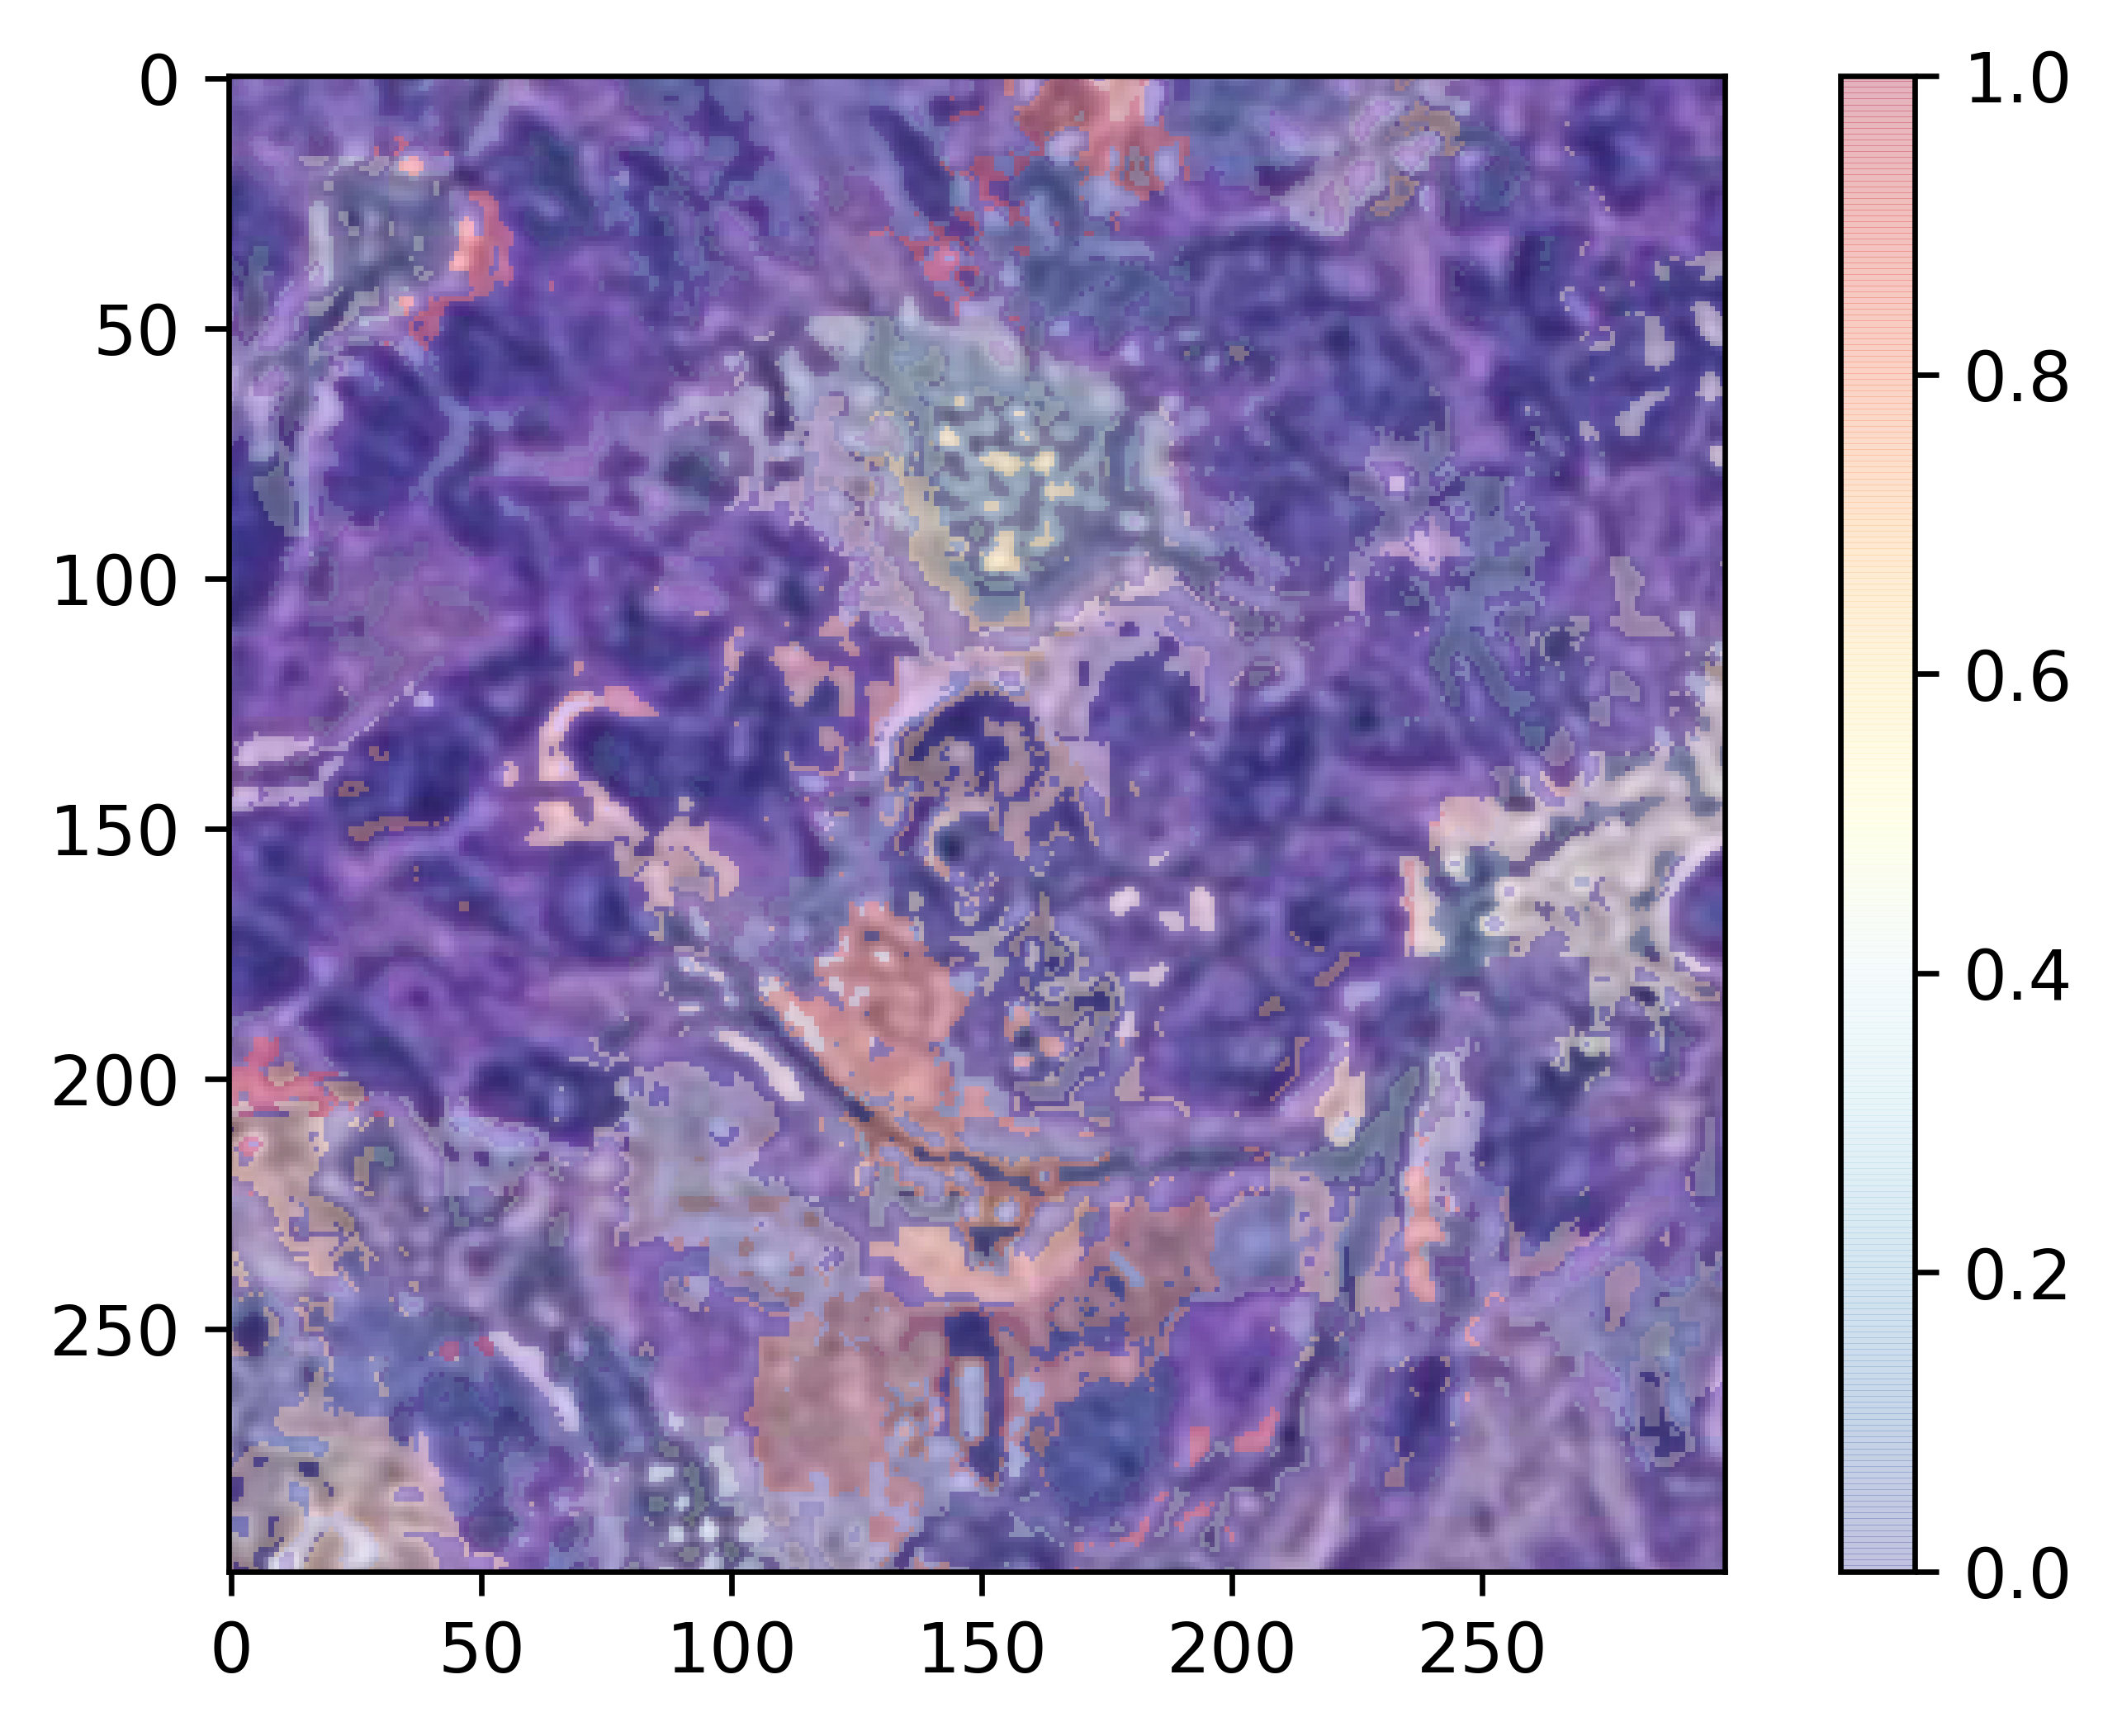

In [122]:
    dict_heatmap1 = dict(explanation.local_exp[explanation.top_labels[0]])
    heatmap1 = np.vectorize(dict_heatmap1.get)(explanation.segments)
    heatmap1 = np.maximum(heatmap1, 0)
    heatmap1 /= np.max(heatmap1)
    plt.imshow(image.numpy().astype(int))
    plt.imshow(heatmap1, alpha=0.3, cmap = 'RdYlBu_r')
    plt.colorbar()

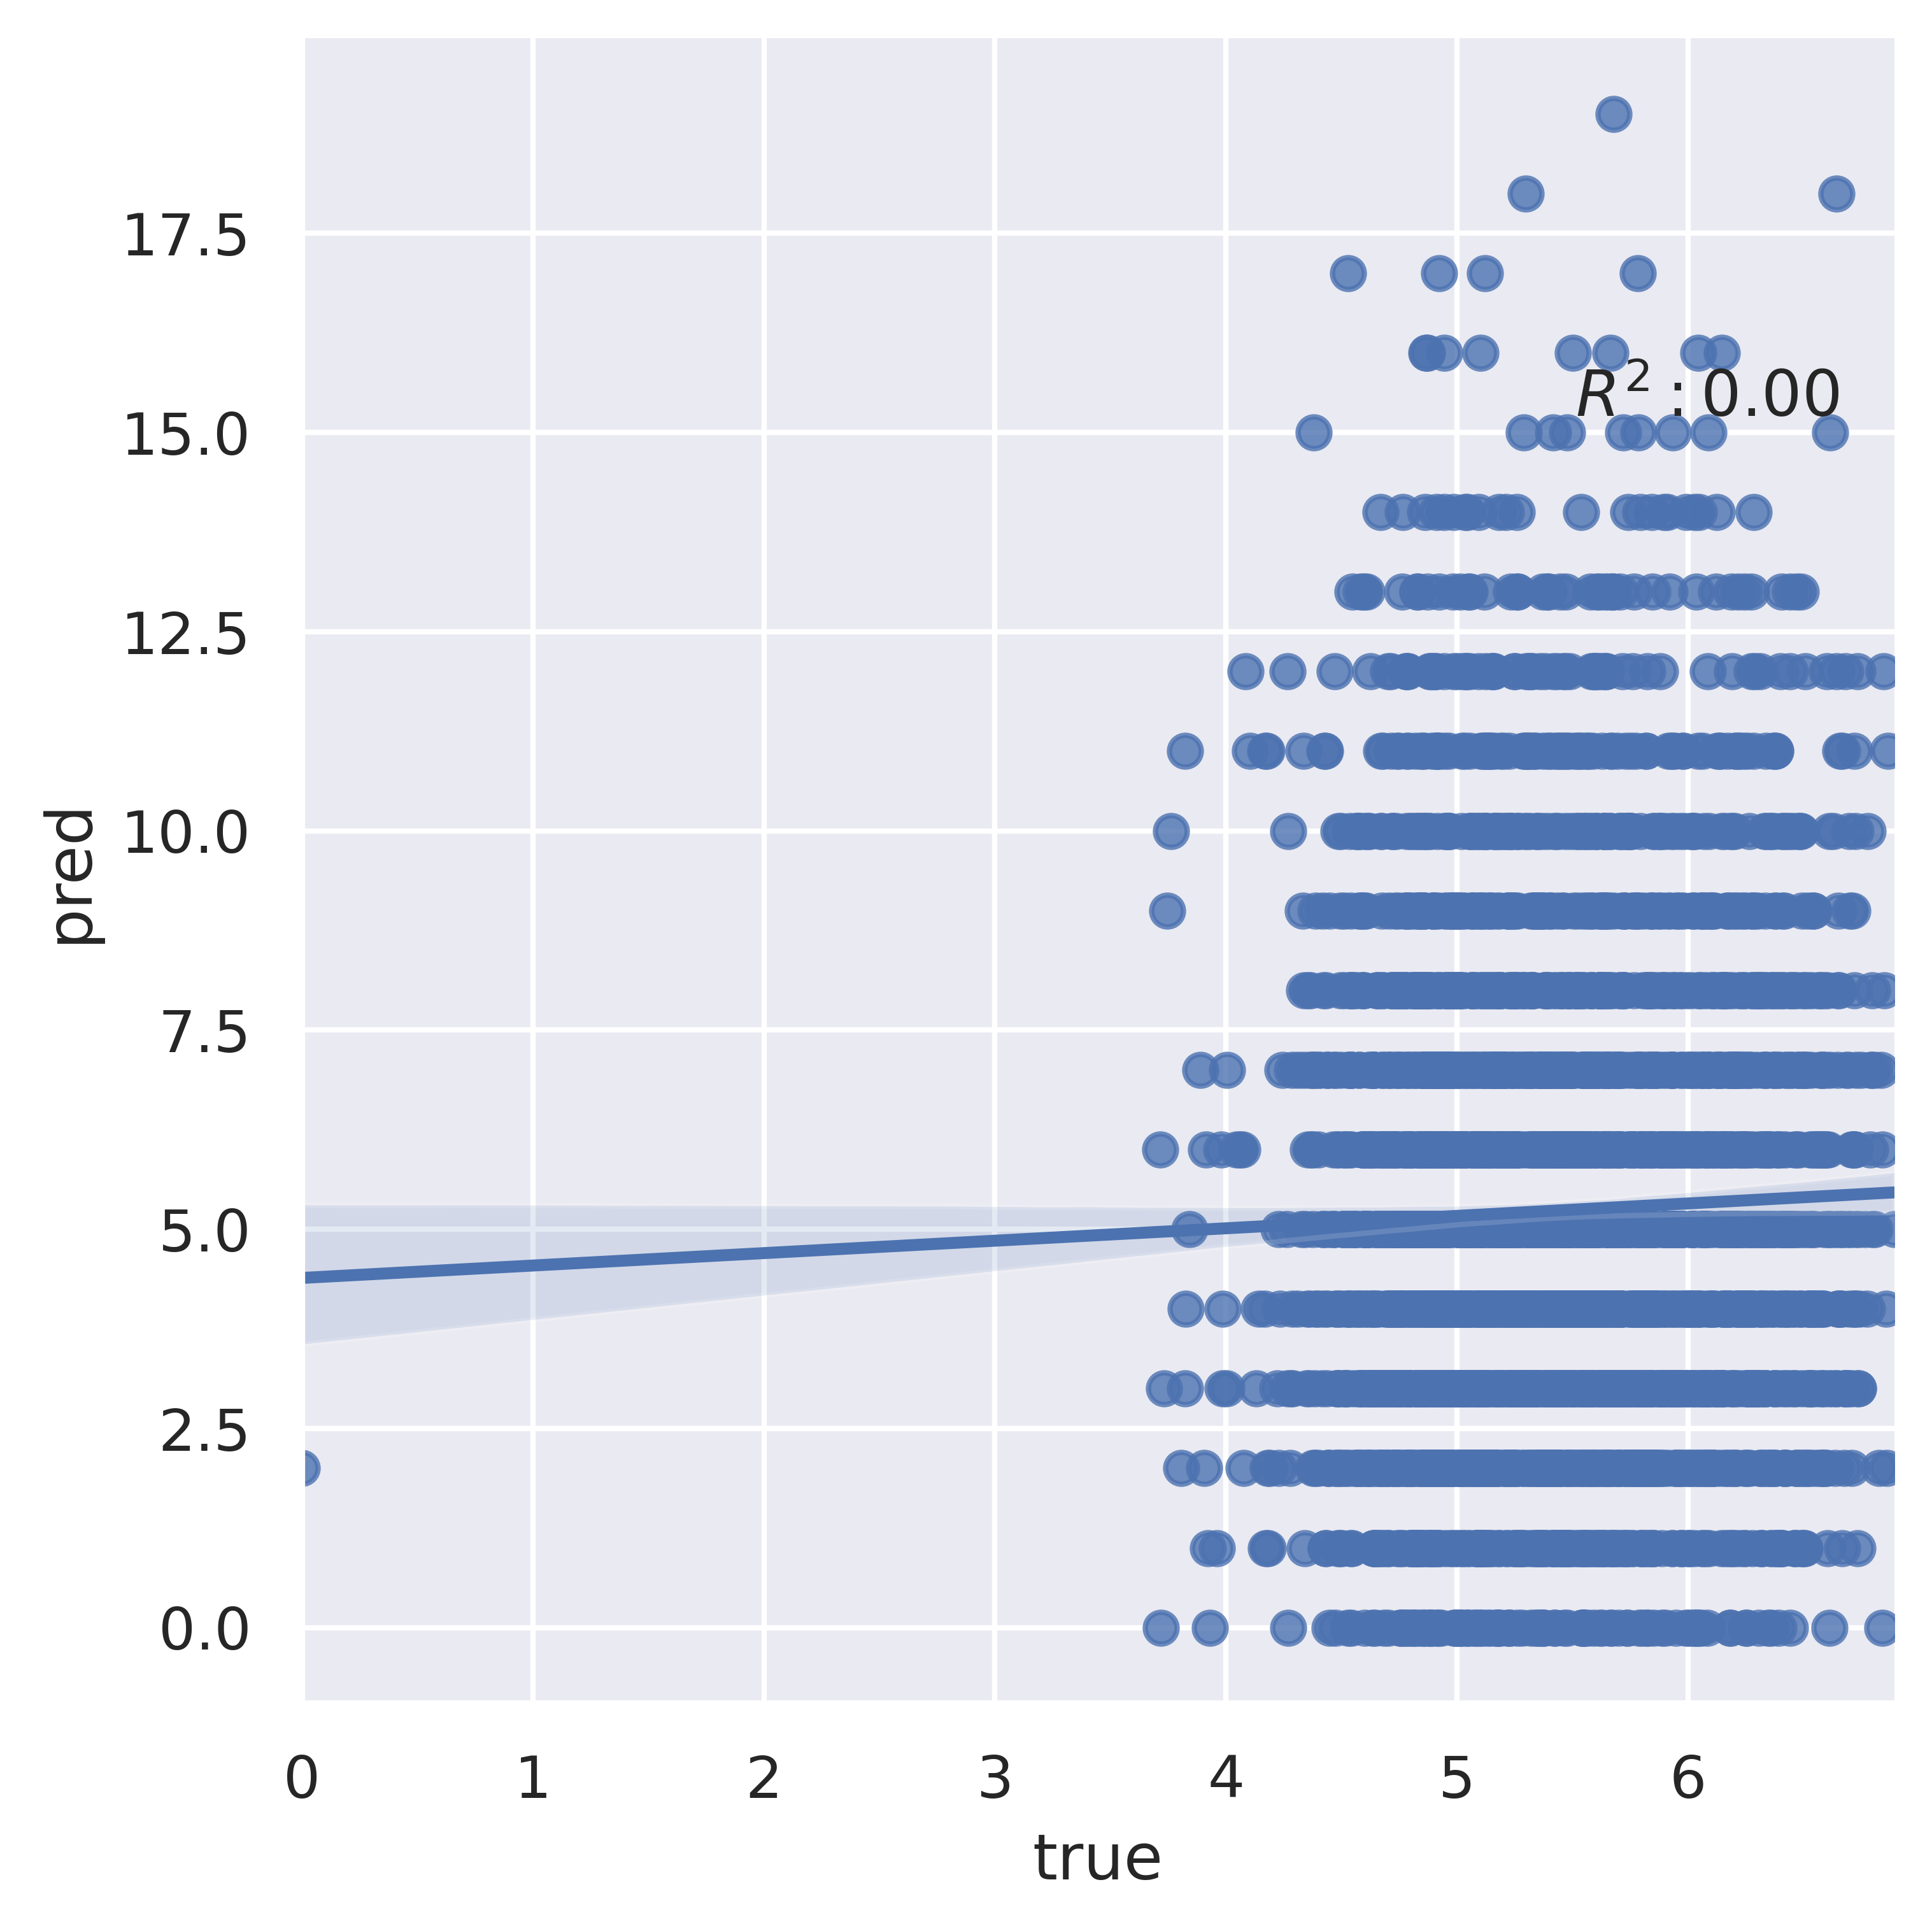

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

true_y = np.array(test_dataset[:,gene].to_df()).ravel()
pred_y = np.array(test_dataset_[:,gene].to_df()).ravel()
df = pd.DataFrame({"true_y":true_y, "pred_y":pred_y})
r2 = stats.pearsonr(true_y, 
                    pred_y)[0] ** 2
sns.set_theme()
g = sns.lmplot(data=df,
    x="true_y", y="pred_y",
    height=5, legend=True
)
# g.set(ylim=(0, 360), xlim=(0,360))

g.set_axis_labels("true", "pred")
plt.annotate(r'$R^2:{0:.2f}$'.format(r2),
            (max(true_y)*0.8, max(pred_y)*0.8))
plt.show()

In [147]:
import pickle

In [149]:
with open("/scratch/imb/Xiao/STimage/development/TCGA_test/gene_list.pkl", 'rb') as f:
    x = pickle.load(f)

In [151]:
len(x)

1522